# ID5059 P2 Group Project

### Imports

In [5]:
# use pip to install all the libraries we need
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn | grep -v 'already satisfied'

# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # remove warnings

### Read in the data

In [2]:
# read the data, dropping the ID column, as this is duplicated by pandas
raw_training_data = pd.read_csv(r"train.csv").drop(columns=["id"])
raw_test_data = pd.read_csv(r"test.csv").drop(columns=["id"])

### Data analysis

In [3]:
print(f"Train set shape: {raw_training_data.shape}") 
# print(f"Test set shape: {raw_test_data.shape}") # doesn't have the 'Status' column
# print()

Train set shape: (7905, 19)


In [6]:
print(f"Null count for both data sets:")
print(pd.concat([raw_training_data.isnull().sum().astype(float), raw_test_data.isnull().sum().astype(int)], axis=1).rename(columns={0: 'Train Set', 1: 'Test Set'}))
print()

Null count for both data sets:
               Train Set  Test Set
N_Days               0.0       0.0
Drug                 0.0       0.0
Age                  0.0       0.0
Sex                  0.0       0.0
Ascites              0.0       0.0
Hepatomegaly         0.0       0.0
Spiders              0.0       0.0
Edema                0.0       0.0
Bilirubin            0.0       0.0
Cholesterol          0.0       0.0
Albumin              0.0       0.0
Copper               0.0       0.0
Alk_Phos             0.0       0.0
SGOT                 0.0       0.0
Tryglicerides        0.0       0.0
Platelets            0.0       0.0
Prothrombin          0.0       0.0
Stage                0.0       0.0
Status               0.0       NaN



In [8]:
print("Summary of numerical features:")
print(raw_training_data.describe().round(3))
print()

Summary of numerical features:
         N_Days        Age  Bilirubin  Cholesterol   Albumin    Copper  \
count  7905.000   7905.000   7905.000     7905.000  7905.000  7905.000   
mean   2030.173  18373.146      2.594      350.562     3.548    83.903   
std    1094.234   3679.959      3.813      195.379     0.346    75.899   
min      41.000   9598.000      0.300      120.000     1.960     4.000   
25%    1230.000  15574.000      0.700      248.000     3.350    39.000   
50%    1831.000  18713.000      1.100      298.000     3.580    63.000   
75%    2689.000  20684.000      3.000      390.000     3.770   102.000   
max    4795.000  28650.000     28.000     1775.000     4.640   588.000   

        Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
count   7905.000  7905.000        7905.00   7905.000     7905.000  7905.000  
mean    1816.745   114.605         115.34    265.229       10.629     3.033  
std     1903.751    48.791          52.53     87.466        0.782   

In [9]:
print(pd.concat([raw_training_data.nunique().rename('Unique count'), raw_training_data.dtypes.rename('Data type'), ], axis=1))
print()

               Unique count Data type
N_Days                  461     int64
Drug                      2    object
Age                     391     int64
Sex                       2    object
Ascites                   2    object
Hepatomegaly              2    object
Spiders                   2    object
Edema                     3    object
Bilirubin               111   float64
Cholesterol             226   float64
Albumin                 160   float64
Copper                  171   float64
Alk_Phos                364   float64
SGOT                    206   float64
Tryglicerides           154   float64
Platelets               227   float64
Prothrombin              49   float64
Stage                     4   float64
Status                    3    object



In [11]:
print("Proportion of each response variable:")
print(raw_training_data['Status'].value_counts() / np.shape(raw_training_data)[0])
print()

Proportion of each response variable:
Status
C     0.628083
D     0.337128
CL    0.034788
Name: count, dtype: float64



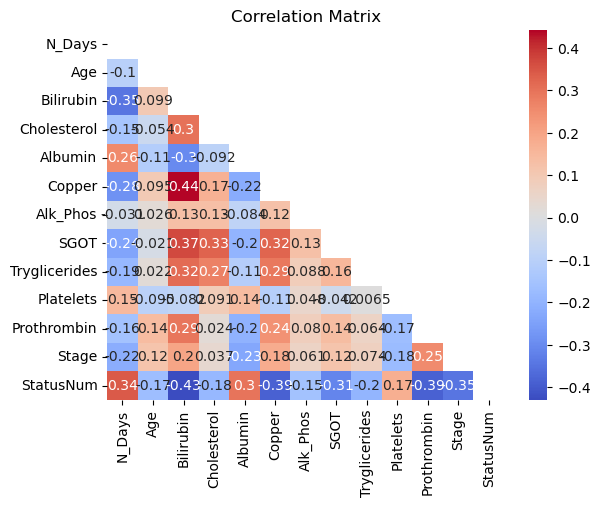

In [12]:
# convert Status response to numerical for correlation exploration
response_map = {'D':0, 'CL':1, 'C':2}
raw_training_data['StatusNum'] = raw_training_data['Status'].map(response_map)

matrix = raw_training_data[raw_training_data.select_dtypes(include=['int64', 'float64']).columns].corr() # define correlation matrix
train = raw_training_data.drop(columns=['StatusNum']) # drop the numerical Status label
diagmask = np.triu(np.ones_like(matrix)) # create mask to only map lower diagonal
sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=diagmask) # plot the heatmap
plt.title('Correlation Matrix')
plt.show()

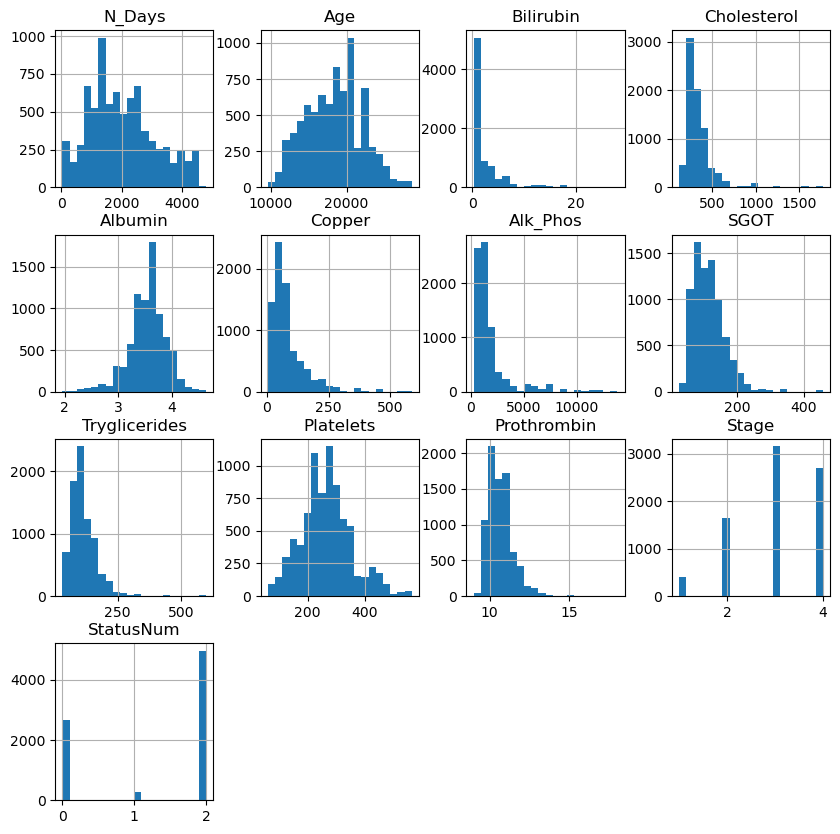

In [13]:
# plot histograms for numerical variables
raw_training_data.hist(bins=20, figsize=(10, 10))
plt.show()

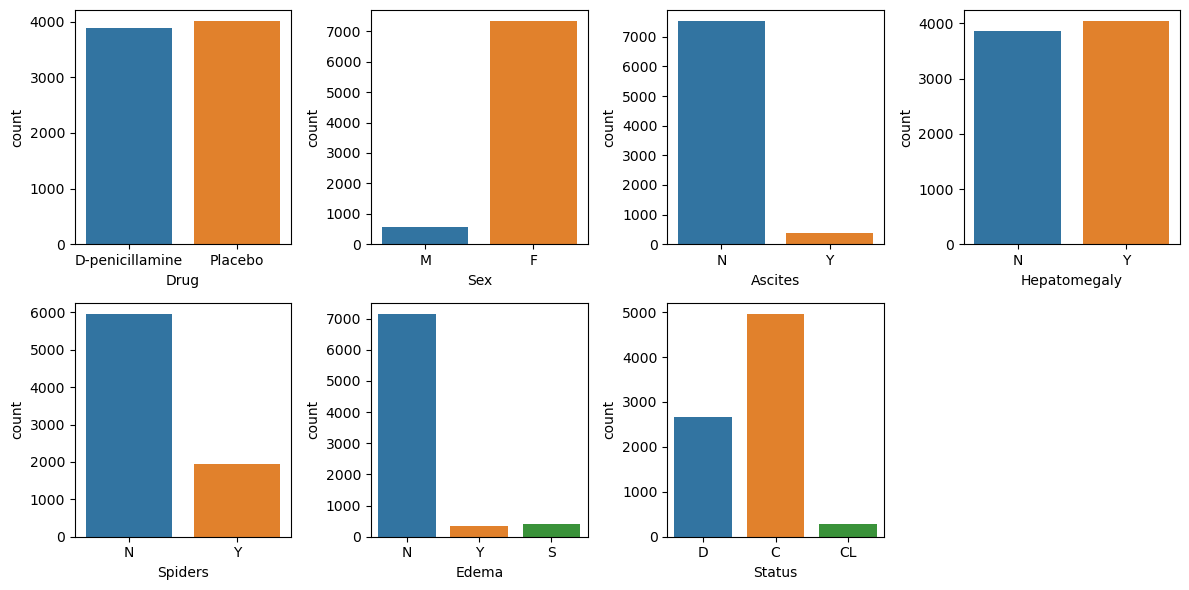

In [14]:
# plot countplots for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6)) # initialise figure and axes
axs = axs.flatten()

categorical = train.select_dtypes(include='object').columns # store the categorical variables
for i in range(len(categorical)): # loop over categorical variables
    sns.countplot(x=categorical[i], data=raw_training_data, ax=axs[i]) # countplot for each variable
[ax.remove() for ax in axs[7:]] # remove final axis
plt.tight_layout()

### Imputation

What we need to do:
* Select three imputation methods
* Make a copy of the training data
* Remove a randomly selected proportion of the data values
* Impute missing values and compare results to original data

### Data Sampling